<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/ProjekFinansial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Kehawatiran adanya keterlambatan pembayaran kartu kredit pada FinanKU yang akan merugikan bisnis. Sehingga orang-orang yang memiliki potensi untuk mengalami keterlambatan bayar bisa diprediksi lebih cepat untuk menentukan strategi yang sesuai dalam menghadapi kondisi dimasa mendatang.

# Objective

Membuat sebuah model yang dapat memprediksi setidaknya 60% dari pelanggam yang akan mengalami telat bayar kartu kredit [Accuracy $ Recall di atas 60%].

# Variabel yang Tersedia
Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


1.   **Customer ID**: Unique ID Customer
2.   **Branch**: Lokasi Cabang Nasabah Terdaftar
3. **City**: Lokasi Kota Nasabah Terdaftar
4. **Age**: Umur Nasabah Terdaftar
5. **AVG Annual Income/Month** : Rata-rata penghasilan nasabah dalam satu tahun
6. **Balance(Q1-Q4)**: Saldo mengendap yang dimiliki nasabah di akhir kuartal
7. **HasCrCard(Q1-Q4)**: Status kepemilikan produk kartu kredit nasabah di akhir kuartal
8. **Active Member(Q1-Q4)**:Status Keaktifan nasabah
9. **Unpaid Tagging:** Status nasabah gagal bayar
10. **NumOfProduct:** Jumlah kepemilikan produk nasabah di quartel akhir

# Experimant

Produk Tinjauan:
1. Nasabah Direview selama satu tahun terakhir
2. Nasabah direview selama 6 bulan terakhir.

Penyesuaian Variabel:
1. Balance dilihat dari rata-rata selama horizon waktu dan dilihat perbulan pada akhir tinjauan dan awal tinjauan
2. Melihat kepemilikan jumlah produk dari rata-rata, maksimum, dan minimum pada priode tinjauan
3. Status keaktifan nasabah dilihat dalam bentuk bulan.

In [267]:
!pip install jcopml

In [268]:
# Libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

In [269]:
pd.set_option('display.max_columns', None)

# Data For Prediction

In [270]:
from google.colab import drive
drive.mount('/content/drive')
path_1 = '/content/drive/MyDrive/Dataset/ProjekFinanKU/DataAll.csv'
path_2 = '/content/drive/MyDrive/Dataset/ProjekFinanKU/DataValidasi.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [271]:
df_all = pd.read_csv(path_1)
df_vall = pd.read_csv(path_2)

Dataset Untuk Eksperimen 1

In [272]:
df1 = pd.read_csv(path_1)
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


Dataset Untuk Eksperimen 2

In [273]:
df2 = pd.read_csv(path_1)
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0


# Data Understanding

Sebaran nasabah berdasarkan lokasi:
1. Sebaran Keseluruhan
2. Sebaran Nasabah Gagal Bayar

In [274]:
data1 = pd.DataFrame(df_all.groupby('City')['Customer ID'].count().sort_values(ascending=False).reset_index(name='Distribusi by City'))
data1

,City,Distribusi by City
0,Surabaya,3767
1,Bandung,1898
2,Jakarta,1896


In [275]:
data2 = pd.DataFrame(df_all[df_all['Unpaid Tagging']==1].groupby('City')['Customer ID'].count().sort_values(ascending=False).reset_index(name='Distribusi by City'))
data2

,City,Distribusi by City
0,Surabaya,1033
1,Bandung,496
2,Jakarta,490


Sebaran nasabah berdasarkan Usia:
- Sebaran Keseluruhan
- Sebaran berdasarkan Gagal Bayar

In [276]:
data3 = pd.DataFrame(df_all.groupby('Age')['Customer ID'].count().reset_index(name='Distribusi by Age'))
data3.sort_values(by=['Age'], ascending=True, inplace=True)

<Axes: title={'center': 'Cust. Distribusi By Age'}, xlabel='Age', ylabel='People'>

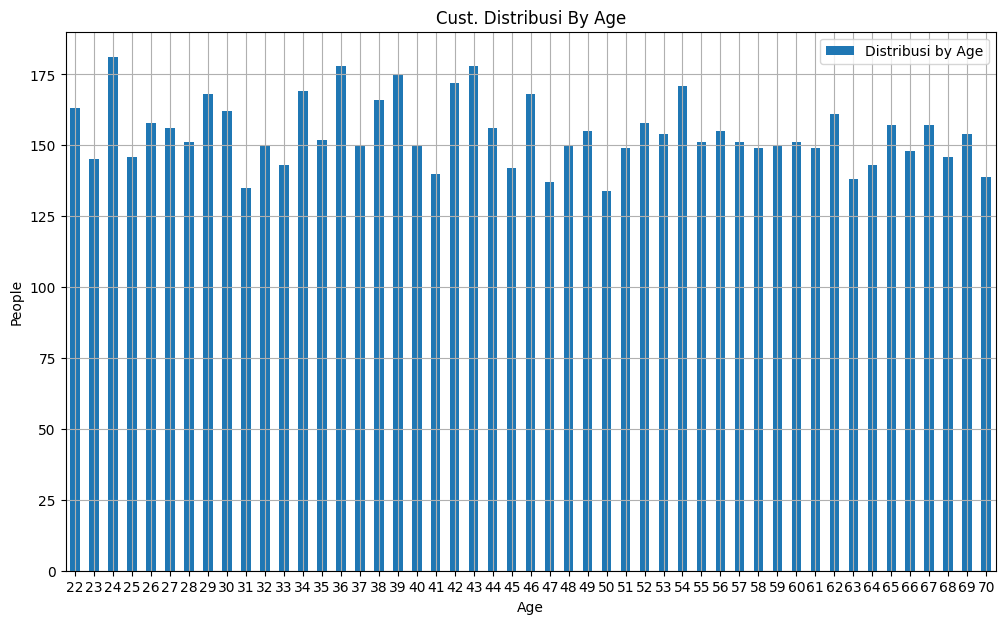

In [277]:
# Visualisasi
data3.plot(x='Age',
           y=['Distribusi by Age'],
           kind='bar',
           grid=True,
           xlabel='Age',
           ylabel='People',
           figsize=(12,7),
           rot=0,
           title='Cust. Distribusi By Age',
           table = False,
           secondary_y = False)

<Axes: title={'center': 'Unpaid Cust. Distribusi By Age'}, xlabel='Age', ylabel='People'>

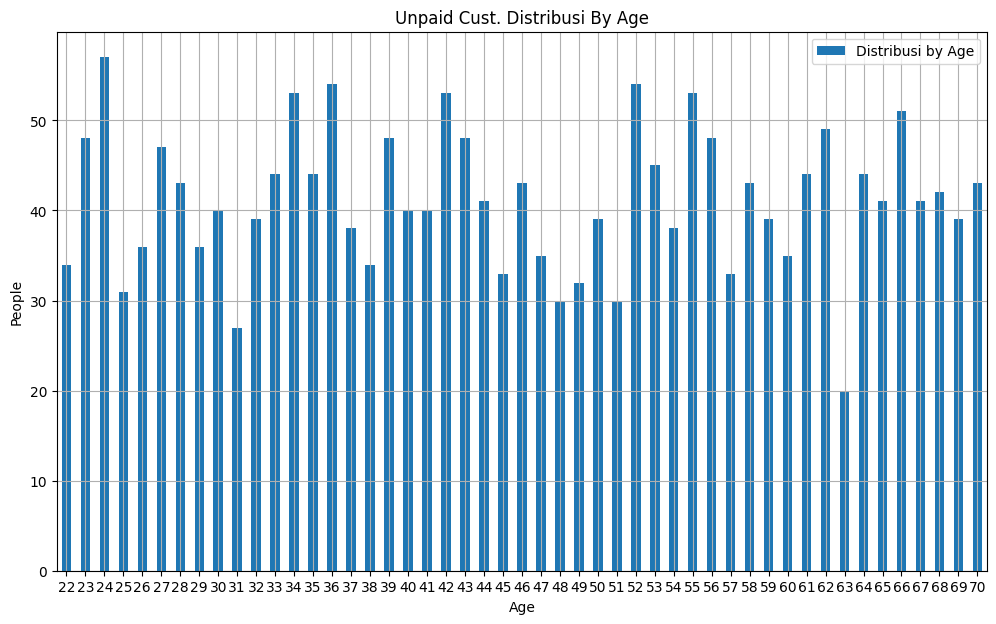

In [278]:
data4 = pd.DataFrame(df_all[df_all['Unpaid Tagging']==1].groupby(by=['Age'])['Customer ID'].count().reset_index(name='Distribusi by Age'))
data4.sort_values(by=['Age'], ascending=True, inplace=True)

# Visualisasi
data4.plot(x='Age',
           y=['Distribusi by Age'],
           kind='bar',
           grid=True,
           xlabel='Age',
           ylabel='People',
           figsize=(12,7),
           rot=0,
           title='Unpaid Cust. Distribusi By Age',
           table = False,
           secondary_y = False)

Rata-rata Saldo Nasabah

In [279]:
df_checkblance = df_all

In [280]:
df_checkblance['Total Balance'] = df_checkblance['Balance Q1'] + df_checkblance['Balance Q2'] + df_checkblance['Balance Q3'] + df_checkblance['Balance Q4']
df_checkblance['AVG Balance'] = (df_checkblance['Balance Q1'] + df_checkblance['Balance Q2'] + df_checkblance['Balance Q3'] + df_checkblance['Balance Q4']) / 4

In [281]:
df_checkblance.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Total Balance,AVG Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,1187036.18,296759.045
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.000
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,1351820.24,337955.060
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.000
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,1110096.36,277524.090


In [282]:
data5 = pd.DataFrame(df_checkblance.groupby(by=["Unpaid Tagging"])["Total Balance"].mean().reset_index(name="Avg Annual Balance"))
data5

,Unpaid Tagging,Avg Annual Balance
0,0,1.985924e+08
1,1,2.527238e+08


In [283]:
data6 = pd.DataFrame(df_checkblance.groupby(by=["Unpaid Tagging"])["AVG Balance"].mean().reset_index(name="Avg Quarterly Balance"))
data6

,Unpaid Tagging,Avg Quarterly Balance
0,0,4.964809e+07
1,1,6.318095e+07


Rata-rata Pemilik Produk

In [284]:
df_checkblance['Avg Product'] = (df_checkblance['NumOfProducts Q1'] + df_checkblance['NumOfProducts Q2'] + df_checkblance['NumOfProducts Q3'] + df_checkblance['NumOfProducts Q4']) / 4

In [285]:
data7 = pd.DataFrame(df_checkblance.groupby(by=["Unpaid Tagging"])["Avg Product"].mean().reset_index(name="Avg Product Owned"))
data7

,Unpaid Tagging,Avg Product Owned
0,0,1.667223
1,1,1.609336


In [286]:
df_all = df_all.drop(columns=["Total Balance", "AVG Balance", "Avg Product"])

# **Data Preparation**

Pengecekan Data Duplikat dan Missing Value

In [287]:
df_all.duplicated().sum()

0

In [288]:
df_all.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q1,0
NumOfProducts Q1,0
HasCrCard Q1,0
ActiveMember Q1,0
Balance Q2,0


# **Penambahan Variabel Relevan**

Rata-Rata Saldo dan Perubahan Saldo Selama Periode Observasi:
Melihat Saldo nasabah dalam scope observasi:
- Eksperiment 1 : Rata - rata saldo nasabah dalam 1 tahun terakhir dan perubahan saldo di Q4 terhadap Q1
- Eksperiment 2 : Rata - rata saldo nasabah dalam 6 bulan terakhir dan perubahan saldo di Q4 terhadap Q2

Eksperiment 1

In [289]:
df1['Mean Balance'] = (df1['Balance Q1'] + df1['Balance Q2'] + df1['Balance Q3'] + df1['Balance Q4']) / 4
df1['Delta Balance'] = df1['Balance Q4'] - df1['Balance Q1']

In [290]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68


Eksperiment 2

In [291]:
df2['Mean Balance'] = (df2['Balance Q3'] + df2['Balance Q4'])/2
df2['Delta Balance'] = df2['Balance Q4'] - df2['Balance Q2']

In [292]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68


# Status Keaktifan
Melihat periode nasabah aktif dalam scope observasi:
- Ekperiment 1 : Keaktifan nasabah (dalam bulan) di 1 tahun terakhir
- Ekperiment 2 : Keaktifan nasabah (dalam bulan) di 6 bulan terakhir

Ekeperiment 1

In [293]:
df1['Active Months'] = (df1["ActiveMember Q1"] + df1["ActiveMember Q2"] + df1["ActiveMember Q3"] + df1["ActiveMember Q4"])*3

In [294]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6


Eksperiment 2

In [295]:
df2['Active Months'] = (df2["ActiveMember Q3"] + df2["ActiveMember Q4"])*3

In [296]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6


# **Penambahan/Pengurangan Product**
Melihat Fluktuasi kepemilikan produk nasabah dalam periode observasi

Eksperimen 1

In [297]:
df1['Diff PH'] = df1["NumOfProducts Q4"] - df1["NumOfProducts Q1"]

In [298]:
df1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,296759.045,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,337955.060,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.000,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,277524.090,431190.68,6,0


Eksperimen 2

In [299]:
df2["Diff PH"] = df2["NumOfProducts Q4"] - df2["NumOfProducts Q2"]

In [300]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6,0


# **Lama Kepemilikan Kartu Kredit dalam periode observasi**

In [301]:
def assign_cr1(df):
    if df["HasCrCard Q1"] == 1:
        return 12
    elif df["HasCrCard Q2"] == 1:
        return 9
    elif df["HasCrCard Q3"] == 1:
        return 6
    else:
        return 3
    return np.nan

In [302]:
df1["Vintage_CR"] = df1.apply(assign_cr1, axis=1)

In [303]:
df1.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.000000e+00,1,1,1,0.000000e+00,1,1,0,0.000000e+00,1,1,0,1.187036e+06,1,1,1,1,2.967590e+05,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,1.351820e+06,2,1,1,0,3.379551e+05,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0.000000e+00,2,1,0,0,0.000000e+00,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.000000e+00,2,1,0,0.000000e+00,2,1,0,6.789057e+05,2,1,1,4.311907e+05,2,1,1,0,2.775241e+05,431190.68,6,0,12
5,15566495,1005,Jakarta,27,15000000,5.290661e+07,1,1,1,5.290661e+07,1,1,0,5.317874e+07,1,1,1,5.325285e+07,1,1,1,0,5.306120e+07,346243.00,9,0,12
6,15566543,1003,Jakarta,68,26000000,1.104222e+08,1,1,1,1.100293e+08,1,1,1,1.096295e+08,2,1,1,1.096295e+08,2,1,0,0,1.099276e+08,-792643.00,9,1,12
7,15566594,1008,Jakarta,61,24000000,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,0.000000e+00,3,1,0,1,0.000000e+00,0.00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0.000000e+00,2,1,1,0.000000e+00,2,1,0,2.996062e+05,2,1,1,2.996062e+05,3,1,0,0,1.498031e+05,299606.24,6,1,12
9,15566958,1005,Jakarta,70,23000000,7.998257e+07,1,0,0,7.962031e+07,1,0,1,7.940154e+07,1,0,1,7.940154e+07,1,1,0,1,7.960149e+07,-581026.00,6,0,3


In [304]:
df2["Vintage_CR"] = df2.apply(assign_cr1, axis=1)

In [305]:
df2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0,0.00,0.00,0,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,0,555048.18,431190.68,6,0,12


# **Penghapus Variabel**

Status Kepemilikan sudah digantikan dengan lama kepemilikan Kartu kredit

In [306]:
df1 = df1.drop(columns= ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4'])
df2 = df2.drop(columns= ['HasCrCard Q1', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4'])

Balance Per Quarter sudah digantikan dengan rata-rata saldo dalam periode observasi & selisih saldo di awal dan akhir periode observasi

In [307]:
df1 = df1.drop(columns= ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4'])
df2 = df2.drop(columns= ['Balance Q1', 'Balance Q2', 'Balance Q3', 'Balance Q4'])

Jumlah Kepemilikan Produk sudah digantikan dengan fluktuasi kepemilikan produk pada periode observasi

In [308]:
df1 = df1.drop(columns= ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4'])
df2 = df2.drop(columns= ['NumOfProducts Q1', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4'])

Status keaktifan nasabah Per Quarter sudah digantikan dengan keaktifan dalam bulan

In [309]:
df1 = df1.drop(columns= ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])
df2 = df2.drop(columns= ['ActiveMember Q1', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4'])

# **Data Transfrom**

Pemisahan Variabel Prediktor

In [310]:
predictor1 = df1[df1.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2 = df2[df2.columns.difference(['Customer ID', 'Unpaid Tagging'])]

In [311]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,6,29,33000000,1001,Jakarta,1187036.18,0,296759.045,12
1,3,68,17000000,1005,Jakarta,0.00,0,0.000,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,337955.060,12
3,3,42,19000000,1008,Jakarta,0.00,0,0.000,12
4,6,43,29000000,1009,Jakarta,431190.68,0,277524.090,12


In [312]:
predictor2.head()

,Active Months,Age,Avg. Annual Income/Month,Branch Code,City,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,3,29,33000000,1001,Jakarta,1187036.18,0,593518.09,12
1,0,68,17000000,1005,Jakarta,0.00,0,0.00,12
2,3,25,12000000,1009,Jakarta,1351820.24,0,675910.12,12
3,0,42,19000000,1008,Jakarta,0.00,0,0.00,12
4,6,43,29000000,1009,Jakarta,431190.68,0,555048.18,12


**Melakukan Encoding Untuk data category**
Variabel Category:
- Branch Code
- City

Untuk Branch Code perlu diubah menjadi string yang dianggap sebagai data kategori

In [313]:
predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)

<ipython-input-313-b9748522fe9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1['Branch Code'] = predictor1['Branch Code'].astype(str)
<ipython-input-313-b9748522fe9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2['Branch Code'] = predictor2['Branch Code'].astype(str)


In [314]:
predictor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [315]:
predictor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Active Months             7561 non-null   int64  
 1   Age                       7561 non-null   int64  
 2   Avg. Annual Income/Month  7561 non-null   int64  
 3   Branch Code               7561 non-null   object 
 4   City                      7561 non-null   object 
 5   Delta Balance             7561 non-null   float64
 6   Diff PH                   7561 non-null   int64  
 7   Mean Balance              7561 non-null   float64
 8   Vintage_CR                7561 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 531.8+ KB


In [316]:
predictor1 = pd.get_dummies(predictor1).astype(int)
predictor2 = pd.get_dummies(predictor2).astype(int)

In [317]:
predictor1.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1187036,0,296759,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,68,17000000,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820,0,337955,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,42,19000000,0,0,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190,0,277524,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [318]:
predictor2.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,3,29,33000000,1187036,0,593518,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,68,17000000,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,25,12000000,1351820,0,675910,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,42,19000000,0,0,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190,0,555048,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [319]:
predname = predictor1.columns
predname_num = predictor1.columns[0:7]
predname_cat = predictor1.columns[7:31]

In [320]:
predname

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR', 'Branch Code_1001',
       'Branch Code_1002', 'Branch Code_1003', 'Branch Code_1004',
       'Branch Code_1005', 'Branch Code_1006', 'Branch Code_1007',
       'Branch Code_1008', 'Branch Code_1009', 'Branch Code_1011',
       'Branch Code_1012', 'Branch Code_1013', 'Branch Code_1014',
       'Branch Code_1015', 'Branch Code_1021', 'Branch Code_1022',
       'Branch Code_1023', 'Branch Code_1024', 'City_Bandung', 'City_Jakarta',
       'City_Surabaya'],
      dtype='object')

In [321]:
predname_num

Index(['Active Months', 'Age', 'Avg. Annual Income/Month', 'Delta Balance',
       'Diff PH', 'Mean Balance', 'Vintage_CR'],
      dtype='object')

In [322]:
predname_cat

Index(['Branch Code_1001', 'Branch Code_1002', 'Branch Code_1003',
       'Branch Code_1004', 'Branch Code_1005', 'Branch Code_1006',
       'Branch Code_1007', 'Branch Code_1008', 'Branch Code_1009',
       'Branch Code_1011', 'Branch Code_1012', 'Branch Code_1013',
       'Branch Code_1014', 'Branch Code_1015', 'Branch Code_1021',
       'Branch Code_1022', 'Branch Code_1023', 'Branch Code_1024',
       'City_Bandung', 'City_Jakarta', 'City_Surabaya'],
      dtype='object')

In [323]:
x1_num = predictor1[predname_num]
x1_cat = predictor1[predname_cat]
x2_num = predictor2[predname_num]
x2_cat = predictor2[predname_cat]

**Standarisasi Data Numerik**

In [324]:
from sklearn.preprocessing import StandardScaler

In [325]:
pt = StandardScaler()
x1_num = pd.DataFrame(pt.fit_transform(x1_num))
x1_num.head()

,0,1,2,3,4,5,6
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [326]:
x1_num.columns = predname_num
x1_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [327]:
x2_num = pd.DataFrame(pt.fit_transform(x2_num))
x2_num.head()

,0,1,2,3,4,5,6
0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


In [328]:
x2_num.columns = predname_num
x2_num.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


# **Menggabungkan Dataset Prediktor**

In [329]:
X1 = pd.concat([x1_cat, x1_num], axis=1)
X2 = pd.concat([x2_cat, x2_num], axis=1)

In [330]:
X1.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-1.185374,0.663649,1.964593,-0.531491,-0.947970,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,1.580668,-0.680854,-0.319523,-0.531491,-0.953281,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-1.469071,-1.101011,2.281674,-0.531491,-0.947232,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.013239,-0.263360,-0.512791,-0.319523,-0.531491,-0.953281,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.135176,-0.192436,0.327524,0.510181,-0.531491,-0.948314,0.296502


In [331]:
X2.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.185374,0.663649,2.641820,-0.440014,-0.944440,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,1.580668,-0.680854,-0.233476,-0.440014,-0.955071,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.165835,-1.469071,-1.101011,3.040967,-0.440014,-0.942964,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.471959,-0.263360,-0.512791,-0.233476,-0.440014,-0.955071,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.140289,-0.192436,0.327524,0.810973,-0.440014,-0.945129,0.296502


In [332]:
y1 = df1['Unpaid Tagging']
y2 = df2['Unpaid Tagging']

In [333]:
y1.head()

,Unpaid Tagging
0,1
1,0
2,0
3,0
4,0


In [334]:
y2.head()

,Unpaid Tagging
0,1
1,0
2,0
3,0
4,0


# **Mempersiapkan Dataset untuk Validator**

# **Import Data**

In [335]:
df1_vall = pd.read_csv(path_2)
df2_vall = pd.read_csv(path_2)

In [336]:
df1_vall.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


In [337]:
df2_vall.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,1,1,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,2,1,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,2,1,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,2,1,1,431190.68,2,1,1,431190.680,3,1,0,0


# **Penambahan Variabel Relevant**

**Rata-Rata Balance Dan Perubahan Saldo**

In [338]:
df1_vall['Mean Balance'] = (df1_vall['Balance Q2'] + df1_vall['Balance Q3'] + df1_vall['Balance Q4'] + df1_vall['Balance Q5'])/4
df2_vall['Mean Balance'] = (df1_vall['Balance Q4'] + df1_vall['Balance Q5'])/2

In [339]:
df1_vall['Delta Balance'] = df1_vall['Balance Q5'] - df1_vall['Balance Q2']
df2_vall['Delta Balance'] = df2_vall['Balance Q5'] - df2_vall['Balance Q3']

# **Status Keaktivan**

In [340]:
df1_vall['Active Months'] = (df1_vall['ActiveMember Q2'] + df1_vall['ActiveMember Q3'] + df1_vall['ActiveMember Q4'] + df1_vall['ActiveMember Q5'])*3
df2_vall['Active Months'] = (df2_vall['ActiveMember Q4'] + df2_vall['ActiveMember Q5'])*3

# **Penambahan/Pengurangan Product Holding**

In [341]:
df1_vall['Diff PH'] = df1_vall['NumOfProducts Q5'] - df1_vall['NumOfProducts Q2']
df2_vall['Diff PH'] = df2_vall['NumOfProducts Q5'] - df2_vall['NumOfProducts Q3']

# **Lama Kepemilikan Kartu Kredit**

In [342]:
def assign_cr2(df):
    if df['HasCrCard Q2'] ==1:
        return 12
    elif df['HasCrCard Q3'] ==1:
        return 9
    elif df['HasCrCard Q4'] ==1:
        return 6
    else:
        return 3
    return np.nan

In [343]:
df1_vall["Vintage_CR"] = df1_vall.apply(assign_cr2, axis=1)
df2_vall["Vintage_CR"] = df2_vall.apply(assign_cr2, axis=1)

# **Penghapusan Variabel**

In [344]:
df1_vall = df1_vall.drop(columns= ['Balance Q2', 'Balance Q3', 'Balance Q4', 'Balance Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4', 'NumOfProducts Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4', 'HasCrCard Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4', 'ActiveMember Q5'])
df2_vall = df2_vall.drop(columns= ['Balance Q2', 'Balance Q3', 'Balance Q4', 'Balance Q5', 'NumOfProducts Q2', 'NumOfProducts Q3', 'NumOfProducts Q4', 'NumOfProducts Q5', 'HasCrCard Q2', 'HasCrCard Q3', 'HasCrCard Q4', 'HasCrCard Q5', 'ActiveMember Q2', 'ActiveMember Q3', 'ActiveMember Q4', 'ActiveMember Q5'])

In [345]:
df1_vall.head(10)

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Unpaid Tagging,Mean Balance,Delta Balance,Active Months,Diff PH,Vintage_CR
0,15565701,1001,Jakarta,29,33000000,1,6.231940e+05,1.305740e+06,6,0,12
1,15565878,1005,Jakarta,68,17000000,1,0.000000e+00,0.000000e+00,0,0,12
2,15566091,1009,Jakarta,25,12000000,0,7.435011e+05,1.622184e+06,6,0,12
3,15566292,1008,Jakarta,42,19000000,1,0.000000e+00,0.000000e+00,0,2,12
4,15566312,1009,Jakarta,43,29000000,0,3.853218e+05,4.311907e+05,6,1,12
5,15566495,1005,Jakarta,27,15000000,0,5.647607e+07,1.365946e+07,9,0,12
6,15566543,1003,Jakarta,68,26000000,0,1.234332e+08,5.441502e+07,9,2,12
7,15566594,1008,Jakarta,61,24000000,1,0.000000e+00,0.000000e+00,0,0,12
8,15566689,1003,Jakarta,43,38000000,0,2.247047e+05,2.996062e+05,3,1,12
9,15566958,1005,Jakarta,70,23000000,0,8.243379e+07,1.169147e+07,9,0,6


# **Pemilihan Variabel Predictor**

In [346]:
predictor1_vall = df1_vall[df1_vall.columns.difference(['Customer ID', 'Unpaid Tagging'])]
predictor2_vall = df2_vall[df2_vall.columns.difference(['Customer ID', 'Unpaid Tagging'])]

In [347]:
predictor1_vall['Branch Code'] = predictor1_vall['Branch Code'].astype(str)
predictor2_vall['Branch Code'] = predictor2_vall['Branch Code'].astype(str)

<ipython-input-347-fdc146805930>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor1_vall['Branch Code'] = predictor1_vall['Branch Code'].astype(str)
<ipython-input-347-fdc146805930>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictor2_vall['Branch Code'] = predictor2_vall['Branch Code'].astype(str)


In [348]:
predictor1_vall = pd.get_dummies(predictor1_vall).astype(int)
predictor2_vall = pd.get_dummies(predictor2_vall).astype(int)

In [349]:
predictor1_vall.head()

,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya
0,6,29,33000000,1305739,0,623193,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,68,17000000,0,0,0,12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6,25,12000000,1622184,0,743501,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,42,19000000,0,2,0,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,43,29000000,431190,1,385321,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [350]:
X1_num_vall = predictor1_vall[predname_num]
X1_cat_vall = predictor1_vall[predname_cat]
X2_num_vall = predictor2_vall[predname_num]
X2_cat_vall = predictor2_vall[predname_cat]

In [351]:
X1_num_vall = pd.DataFrame(pt.fit_transform(X1_num_vall))
X1_num_vall.columns = predname_num
X2_num_vall = pd.DataFrame(pt.fit_transform(X2_num_vall))
X2_num_vall.columns = predname_num

In [352]:
X1_vall = pd.concat([X1_cat_vall, X1_num_vall], axis=1)
X2_vall = pd.concat([X2_cat_vall, X2_num_vall], axis=1)

In [353]:
X1_vall.head()

,Branch Code_1001,Branch Code_1002,Branch Code_1003,Branch Code_1004,Branch Code_1005,Branch Code_1006,Branch Code_1007,Branch Code_1008,Branch Code_1009,Branch Code_1011,Branch Code_1012,Branch Code_1013,Branch Code_1014,Branch Code_1015,Branch Code_1021,Branch Code_1022,Branch Code_1023,Branch Code_1024,City_Bandung,City_Jakarta,City_Surabaya,Active Months,Age,Avg. Annual Income/Month,Delta Balance,Diff PH,Mean Balance,Vintage_CR
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.086964,-1.185374,0.663649,-0.373514,-0.517011,-0.942483,0.296502
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.692667,1.580668,-0.680854,-0.497238,-0.517011,-0.953367,0.296502
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.086964,-1.469071,-1.101011,-0.343530,-0.517011,-0.940382,0.296502
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.692667,-0.263360,-0.512791,-0.497238,2.724384,-0.953367,0.296502
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,-0.086964,-0.192436,0.327524,-0.456381,1.103686,-0.946638,0.296502


In [354]:
y1_vall= df1_vall['Unpaid Tagging']
y2_vall = df2_vall['Unpaid Tagging']

# **Pengecekan Korelasi**

**Variabel yang berkorelasi lebih dari 0.7 akan di drop**